In [46]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# specify these sections

In [14]:
repo = ""

data = pd.read_csv(f"{repo}.csv")

target_column = "actual_label_cat"
#or
target_column = "repo_label_cat"

In [41]:
nontext_columns = [    
    'is_pull_request',
    'title_len',
    'body_len',
    'num_comments',
    'num_events',
    'author_followers',
    'closer_followers',
    'author_following',
    'closer_following',
    'author_public_repos',
    'closer_public_repos',
    'author_public_gists',
    'closer_public_gists',
    'author_core_team',
    'author_has_association',
    'author_issue_counts',
    'commits_count',
    'has_commit',
    'cm_developers_number',
    'cm_developers_ratio',
    'cm_developers_unique',
    'cm_authors_unique',
    'cm_developers_ratio_unique',
    'cm_mean_len',
    'time_to_discuss',
    'author_github_cntrb',
    'closer_github_cntrb',
    'author_repo_cntrb',
    'closer_repo_cntrb',
    'title_words_num',
    'body_words_num',   
    'title_alpha_len',
    'title_alphabet_ratio',
    'body_alpha_len',
    'body_alphabet_ratio',
    'body_processed_len',
    'title_processed_len',
    'title_processed_words_num',
    'body_processed_words_num',
    'num_of_sharps',
    'num_of_at',
    'num_of_qmark',
    'num_of_codesnippets',
    'num_of_functions',
    'num_of_issues',
    'num_of_paths',
    'num_of_dates',
    'num_of_times',
    'num_of_urls',
    'num_of_emails',
    'num_of_obligations',
    'has_email',
    'has_code',
    'ft_bug',
    'ft_feature',
    'ft_other',   
    'issue_type',
    'title_sentistrenght_p',
    'body_sentistrenght_p',
    'title_subjectivity',
    'body_subjectivity',
    'positive_body_sentistrenght_n',
    'positive_title_sentistrenght_n',
    'positive_title_polarity',
    'positive_body_polarity',
    'author_account_age',
    'closer_account_age',
    'has_assignee',
    'num_of_assignees',
    'has_milestone',
    'numeric_association'
]

issue_features_total = [    
    
    'num_comments', 'num_events', 'commits_count', 'is_pull_request', 'num_of_assignees', 'has_milestone',
    
    'cm_mean_len', 'time_to_discuss', 'cm_developers_ratio',
    
    'body_processed_len', 'title_processed_len', 'title_processed_words_num', 'body_processed_words_num', 
    'title_alphabet_ratio', 'body_alphabet_ratio',
    
    'num_of_qmark',
    'num_of_codesnippets',
    'num_of_functions',
    'num_of_issues',
    'num_of_paths',
    'num_of_dates',
    'num_of_times',
    'num_of_urls',
    'num_of_sharps',
    'num_of_at',
    'num_of_emails',
    'num_of_obligations',
    
    'ft_bug',
    'ft_feature',
    
    'title_sentistrenght_p',
    'body_sentistrenght_p',
    'title_subjectivity',
    'body_subjectivity',
    'positive_body_sentistrenght_n',
    'positive_title_sentistrenght_n',
    'positive_title_polarity',
    'positive_body_polarity',
]


user_features_total = [
    'author_followers', 'closer_followers', 'author_following', 'closer_following', 'author_public_repos', 'closer_public_repos', 
    'author_public_gists', 'closer_public_gists', 'author_issue_counts',
    'author_github_cntrb', 'closer_github_cntrb', 'author_repo_cntrb', 'closer_repo_cntrb', 'author_account_age',
    'closer_account_age', 'numeric_association'
]

features_total = issue_features_total+user_features_total

issue_features_reduces = [    
    
    'num_comments', 'num_events', 'commits_count', 'is_pull_request', 'num_of_assignees', 'has_milestone',
    
    'cm_mean_len', 'time_to_discuss', 'cm_developers_ratio',
    
    'title_processed_words_num', 'body_processed_words_num', 
    'title_alphabet_ratio', 'body_alphabet_ratio',
    
    'num_of_codesnippets',
    'num_of_urls',
    
    'issue_type',
    
    'body_sentistrenght_p',
    'body_subjectivity',
    'positive_body_sentistrenght_n',
    'positive_body_polarity',
]

user_features_reduced = [
    'author_followers', 'author_following', 'author_public_repos', 'author_public_gists', 'author_issue_counts', 
    'author_github_cntrb', 'author_repo_cntrb', 'author_account_age', 'numeric_association'
]

features_reduced = issue_features_reduces + user_features_reduced

In [42]:
columns = nontext_columns #all the numerical columns
#or
columns = features_total 
#or
columns = features_reduced #independent columns

# filter method

In [43]:
df = data[columns+[target_column]]
X = df[columns]
y = df[target_column]

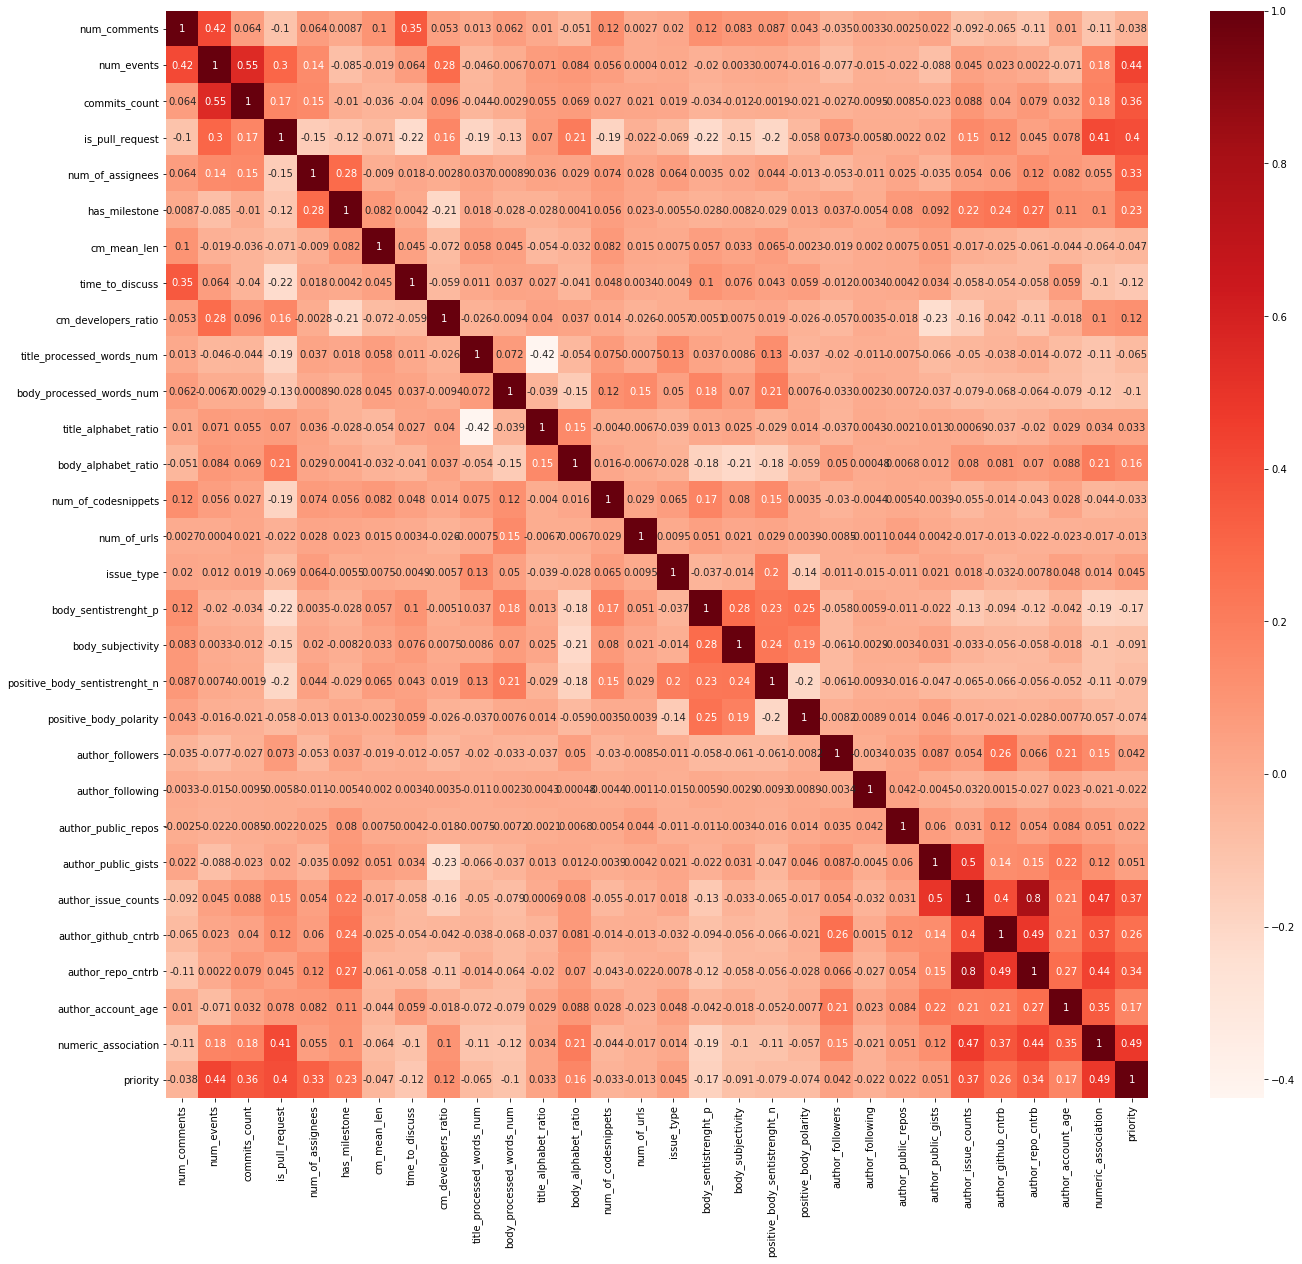

In [44]:
plt.figure(figsize=(22,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [45]:
#Correlation with output variable
cor_target = abs(cor[target_column])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

priority    1.0
Name: priority, dtype: float64

In [ ]:
list_of_correlated_features = []  #az ruye shekl
print(df[list_of_correlated_features].corr())

# wrapper method

## i. Backward Elimination

In [52]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                             8.931299e-07
num_comments                      0.000000e+00
num_events                        0.000000e+00
commits_count                    2.657468e-120
is_pull_request                   0.000000e+00
num_of_assignees                  0.000000e+00
has_milestone                     0.000000e+00
cm_mean_len                       3.928721e-01
time_to_discuss                   8.643592e-18
cm_developers_ratio               4.166120e-28
title_processed_words_num         6.614663e-02
body_processed_words_num          1.464121e-12
title_alphabet_ratio              7.103933e-08
body_alphabet_ratio               1.108631e-02
num_of_codesnippets               2.058912e-01
num_of_urls                       3.633415e-03
issue_type                        1.395186e-40
body_sentistrenght_p              3.109684e-24
body_subjectivity                 3.162119e-05
positive_body_sentistrenght_n     8.693837e-01
positive_body_polarity            4.561107e-11
author_follow

### If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [53]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['num_comments', 'num_events', 'commits_count', 'is_pull_request', 'num_of_assignees', 'has_milestone', 'time_to_discuss', 'cm_developers_ratio', 'body_processed_words_num', 'title_alphabet_ratio', 'body_alphabet_ratio', 'num_of_urls', 'issue_type', 'body_sentistrenght_p', 'body_subjectivity', 'positive_body_polarity', 'author_followers', 'author_public_repos', 'author_public_gists', 'author_issue_counts', 'author_github_cntrb', 'author_repo_cntrb', 'author_account_age', 'numeric_association']


## ii. RFE (Recursive Feature Elimination)

In [60]:
#no of features
nof_list=np.arange(1,len(columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 28
Score with 28 features: 0.546807


In [62]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['num_comments', 'num_events', 'commits_count', 'is_pull_request',
       'num_of_assignees', 'has_milestone', 'cm_mean_len', 'time_to_discuss',
       'cm_developers_ratio', 'title_processed_words_num',
       'body_processed_words_num', 'title_alphabet_ratio',
       'body_alphabet_ratio', 'num_of_codesnippets', 'num_of_urls',
       'issue_type', 'body_sentistrenght_p', 'body_subjectivity',
       'positive_body_polarity', 'author_followers', 'author_following',
       'author_public_repos', 'author_public_gists', 'author_issue_counts',
       'author_github_cntrb', 'author_repo_cntrb', 'author_account_age',
       'numeric_association'],
      dtype='object')


In [63]:
print(rfe.ranking_)

#It then gives the ranking of all the variables, 1 being most important.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]


# Embedded Method

### if the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [66]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000163
Best score using built-in LassoCV: 0.540769


In [68]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 22 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

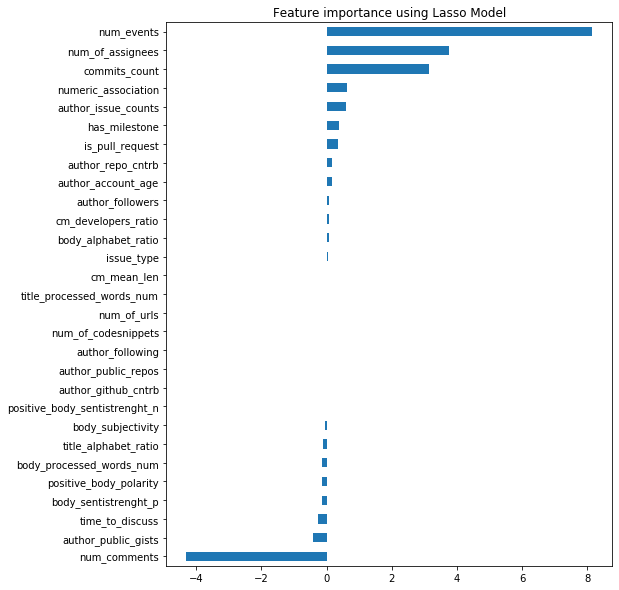

In [69]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")